In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

## 동적 홈페이지를 정적 홈페이지 처럼 scraping하면 안됩니다

In [2]:
url = 'https://comic.naver.com/webtoon/detail?titleId=800770&no=75'
html = urlopen(url)
bs_obj = BeautifulSoup(html, 'html.parser')
results = bs_obj.find_all('span', {'class':"u_cbox_contents"})

- <span style = 'font-size:1.1em;line-height:1.5em'>결과가 없음</span>

In [3]:
print(bs_obj)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="재벌집 막내아들 - 75화" property="og:title"/>
<meta content="https://shared-comic.pstatic.net/thumb/webtoon/800770/75/thumbnail_600x315_a64a75b0-a3ae-4e68-a78e-d17c51879596.jpg" property="og:image"/>
<meta content="75화" property="og:description"/>
<title>재벌집 막내아들 - 75화 : 네이버 웹툰</title>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/2b9ff6ea6e0786dba2d3.css" rel="stylesheet"/>
<script>
        if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
            window.location = 'microsoft-edge:' + window.location;
            setTimeout(function(

In [4]:
print(results)

[]


- <span style = 'font-size:1.1em;line-height:1.5em'>bs_obj객체를 확인해보자</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>\<div\>태그 내의 내용이 다 비어있음</span>


In [5]:
bs_obj


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="재벌집 막내아들 - 75화" property="og:title"/>
<meta content="https://shared-comic.pstatic.net/thumb/webtoon/800770/75/thumbnail_600x315_a64a75b0-a3ae-4e68-a78e-d17c51879596.jpg" property="og:image"/>
<meta content="75화" property="og:description"/>
<title>재벌집 막내아들 - 75화 : 네이버 웹툰</title>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/2b9ff6ea6e0786dba2d3.css" rel="stylesheet"/>
<script>
        if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
            window.location = 'microsoft-edge:' + window.location;
            setTimeout(function(

# 동적 홈페이지 scraping

## selenium 사용하기

In [6]:
from selenium import webdriver

In [7]:
driver = webdriver.Chrome('D:\MyWorkspace\chromedriver.exe')

In [8]:
type(driver)

selenium.webdriver.chrome.webdriver.WebDriver

In [9]:
# 페이지 로드를 위해 기다리는 시간
driver.implicitly_wait(3)

# scraping하려는 웹페이지 주소를 get()에 전달
url = 'https://comic.naver.com/webtoon/detail?titleId=800770&no=75'
driver.get(url)

- <span style = 'font-size:1.1em;line-height:1.5em'>driver의 page_source 속성에서 문자열 형식의 html 파일내용 확인</span>

In [10]:
page = driver.page_source

In [11]:
type(page)

str

'<html lang="ko"><head>\n\t<meta http-equiv="Content-type" content="text/html; charset=UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">\n\t<meta property="og:type" content="article">\n\t<meta property="og:article:author" content="네이버 웹툰">\n\t<meta property="og:article:author:url" content="https://comic.naver.com">\n\t<meta property="og:title" content="재벌집 막내아들 - 75화">\n\t<meta property="og:image" content="https://shared-comic.pstatic.net/thumb/webtoon/800770/75/thumbnail_600x315_a64a75b0-a3ae-4e68-a78e-d17c51879596.jpg">\n\t<meta property="og:description" content="75화">\n\t<title>재벌집 막내아들 - 75화 : 네이버 웹툰</title>\n\t<link rel="shortcut icon" href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" type="image/x-icon">\n\t<link rel="stylesheet" href="/2b9ff6ea6e0786dba2d3.css">\n\t<script>\n        if (/MSIE \\d|Trident.*rv:/.test(navigator.userAgent)) {\n            window.location = \'microsoft-edge:\' + window.location;\n            setTim
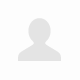
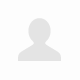

In [12]:
page

## driver로 불러온 웹 페이지에서 BeautifulSoup을 활용하여 scraping

In [13]:
from bs4 import BeautifulSoup

In [14]:
bs_obj = BeautifulSoup(page, 'html.parser')

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="재벌집 막내아들 - 75화" property="og:title"/>
<meta content="https://shared-comic.pstatic.net/thumb/webtoon/800770/75/thumbnail_600x315_a64a75b0-a3ae-4e68-a78e-d17c51879596.jpg" property="og:image"/>
<meta content="75화" property="og:description"/>
<title>재벌집 막내아들 - 75화 : 네이버 웹툰</title>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/2b9ff6ea6e0786dba2d3.css" rel="stylesheet"/>
<script>
        if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
            window.location = 'microsoft-edge:' + window.location;
            setTimeout(function() {
               
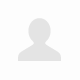
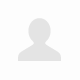

In [15]:
bs_obj

In [16]:
results = bs_obj.find_all('span', {'class':"u_cbox_contents"})

In [17]:
results

[<span class="u_cbox_contents" data-lang="ko" style="">도준이랑 닮은거 하나 있네요.저도 아침 7시에 출근해요 ㅠㅠ </span>,
 <span class="u_cbox_contents" data-lang="ko" style="">와 씨 진짜 김대리도 ㄹㅇ난놈이긴하네 ㅋㅋㅋㅋ 그와중에 자신은 도준의 사람이니까 더는 할말 없다는 스탠스 취하는거 개미쳤네 ㅋㅋㅋㅋㅋ</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">회장님 앞에서 진도준실장.. 압존법 쓰는 디테일.. ㄷㄷ</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">김대리가 학벌은 구려도 눈치 하나는 엄청 빠르네. 브레인은 진도준한테 맡기면 되니까 옆에서 눈치 빠르게 잡일 맡기기엔 오히려 딱 좋아보인다 ㅋㅋㅋ 이학재 옆에서 일 제대로 배우면 나중에 큰 역할 할거같음.</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">진짜 도준이랑 진양철이 거의다 대화하는게 끝인 웹툰인데 왤케 재밌냐 ㅋㅋㅋㅋㅋ진짜 미쳤넨</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">오~~ 김대리.자네 진회장이 사람한번 만들어 보겠다는데
 기대되는군. 어떤모습을 보여줄지ㅎㅎ</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">아니 이게말이되냐? 남자 3명이 대화하는것뿐인 웹툰이 내생활 태도를 다시보게하고..  소름돋게한건 많아도 다시 생각하는 웹툰은 이게 처음이다. 소설 작가한테 고마워 해야하나, 웹툰작가한테 고마워 해야하나?</span>,
 <span class="u_cbox_contents" data-lang="ko" style="">진도준 회귀하기 전 원래 인생에서는 진영기 부회장이 명

In [18]:
[x.text for x in results]

['도준이랑 닮은거 하나 있네요.저도 아침 7시에 출근해요 ㅠㅠ ',
 '와 씨 진짜 김대리도 ㄹㅇ난놈이긴하네 ㅋㅋㅋㅋ 그와중에 자신은 도준의 사람이니까 더는 할말 없다는 스탠스 취하는거 개미쳤네 ㅋㅋㅋㅋㅋ',
 '회장님 앞에서 진도준실장.. 압존법 쓰는 디테일.. ㄷㄷ',
 '김대리가 학벌은 구려도 눈치 하나는 엄청 빠르네. 브레인은 진도준한테 맡기면 되니까 옆에서 눈치 빠르게 잡일 맡기기엔 오히려 딱 좋아보인다 ㅋㅋㅋ 이학재 옆에서 일 제대로 배우면 나중에 큰 역할 할거같음.',
 '진짜 도준이랑 진양철이 거의다 대화하는게 끝인 웹툰인데 왤케 재밌냐 ㅋㅋㅋㅋㅋ진짜 미쳤넨',
 '오~~ 김대리.자네 진회장이 사람한번 만들어 보겠다는데\n기대되는군. 어떤모습을 보여줄지ㅎㅎ',
 '아니 이게말이되냐? 남자 3명이 대화하는것뿐인 웹툰이 내생활 태도를 다시보게하고..  소름돋게한건 많아도 다시 생각하는 웹툰은 이게 처음이다. 소설 작가한테 고마워 해야하나, 웹툰작가한테 고마워 해야하나?',
 '진도준 회귀하기 전 원래 인생에서는 진영기 부회장이 명인대 원장 매수해서 진회장 뇌종양 은폐시켰을듯 현생에서는 진도준하고 사고날 일 없으니까 뇌종양 발견하지도 못했을거니까',
 '진양철 회장 "내 알아서 하마" 이 대사할때 컷에서\n진양철 눈에서 빨간색 눈으로 바뀌는거 보고 약간 소름돋음',
 '김대리가 저래보여도 현실로 따지면 삼성 전략실 대리인데 이미 난놈이긴 함',
 '경영자 입장에선 저런 직원 몇 명만 있어도 성공임. 사장이란건 앉아서 골프만 치고 좋은 차만 타는 사람으로 취급하는 직원이 수두룩함 ㅋㅋㅋ',
 '1등',
 '진짜 만화가 병원에서 이야기만 하다 끝나는데 스릴 넘친다 그냥 난 진회장에게 돈 받고 평범히 놀고먹으련다 ㅜㅜ ',
 'J망한 드라마 말고 원작 스토리로 이어지길 바란다',
 '김대리 낭만 치사량 도핑....!']

In [19]:
[x.text.replace('\n',' ') for x in results]

['도준이랑 닮은거 하나 있네요.저도 아침 7시에 출근해요 ㅠㅠ ',
 '와 씨 진짜 김대리도 ㄹㅇ난놈이긴하네 ㅋㅋㅋㅋ 그와중에 자신은 도준의 사람이니까 더는 할말 없다는 스탠스 취하는거 개미쳤네 ㅋㅋㅋㅋㅋ',
 '회장님 앞에서 진도준실장.. 압존법 쓰는 디테일.. ㄷㄷ',
 '김대리가 학벌은 구려도 눈치 하나는 엄청 빠르네. 브레인은 진도준한테 맡기면 되니까 옆에서 눈치 빠르게 잡일 맡기기엔 오히려 딱 좋아보인다 ㅋㅋㅋ 이학재 옆에서 일 제대로 배우면 나중에 큰 역할 할거같음.',
 '진짜 도준이랑 진양철이 거의다 대화하는게 끝인 웹툰인데 왤케 재밌냐 ㅋㅋㅋㅋㅋ진짜 미쳤넨',
 '오~~ 김대리.자네 진회장이 사람한번 만들어 보겠다는데 기대되는군. 어떤모습을 보여줄지ㅎㅎ',
 '아니 이게말이되냐? 남자 3명이 대화하는것뿐인 웹툰이 내생활 태도를 다시보게하고..  소름돋게한건 많아도 다시 생각하는 웹툰은 이게 처음이다. 소설 작가한테 고마워 해야하나, 웹툰작가한테 고마워 해야하나?',
 '진도준 회귀하기 전 원래 인생에서는 진영기 부회장이 명인대 원장 매수해서 진회장 뇌종양 은폐시켰을듯 현생에서는 진도준하고 사고날 일 없으니까 뇌종양 발견하지도 못했을거니까',
 '진양철 회장 "내 알아서 하마" 이 대사할때 컷에서 진양철 눈에서 빨간색 눈으로 바뀌는거 보고 약간 소름돋음',
 '김대리가 저래보여도 현실로 따지면 삼성 전략실 대리인데 이미 난놈이긴 함',
 '경영자 입장에선 저런 직원 몇 명만 있어도 성공임. 사장이란건 앉아서 골프만 치고 좋은 차만 타는 사람으로 취급하는 직원이 수두룩함 ㅋㅋㅋ',
 '1등',
 '진짜 만화가 병원에서 이야기만 하다 끝나는데 스릴 넘친다 그냥 난 진회장에게 돈 받고 평범히 놀고먹으련다 ㅜㅜ ',
 'J망한 드라마 말고 원작 스토리로 이어지길 바란다',
 '김대리 낭만 치사량 도핑....!']

# 그런데 말입니다

- <span style = 'font-size:1.2em;line-height:1.5em'>사실, Selenium만으로도 편하게 scraping이 가능합니다</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>좀 더, 다양한 기능을 제공하기도 하구요.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>어떻게 하는지 한번 같이 해봅시다</span>

## 앞의 과정을 selenium으로 수행하기

In [20]:
driver = webdriver.Chrome('D:\MyWorkspace\chromedriver.exe')

# 페이지 로드를 위해 기다리는 시간
driver.implicitly_wait(3)

# scraping하려는 웹페이지 주소를 get()에 전달
url = 'https://comic.naver.com/webtoon/detail?titleId=800770&no=75'
driver.get(url)

In [21]:
from selenium.webdriver.common.by import By

- <span style = 'font-size:1.2em;line-height:1.5em'>class이름이 'u_cbox_contents'인 부분을 찾기</span>

In [22]:
tmp = driver.find_elements(By.CLASS_NAME, 'u_cbox_contents')

In [23]:
results = []
for x in tmp:
    results.append(x.text)
    
print(results)

['도준이랑 닮은거 하나 있네요.저도 아침 7시에 출근해요 ㅠㅠ', '와 씨 진짜 김대리도 ㄹㅇ난놈이긴하네 ㅋㅋㅋㅋ 그와중에 자신은 도준의 사람이니까 더는 할말 없다는 스탠스 취하는거 개미쳤네 ㅋㅋㅋㅋㅋ', '회장님 앞에서 진도준실장.. 압존법 쓰는 디테일.. ㄷㄷ', '김대리가 학벌은 구려도 눈치 하나는 엄청 빠르네. 브레인은 진도준한테 맡기면 되니까 옆에서 눈치 빠르게 잡일 맡기기엔 오히려 딱 좋아보인다 ㅋㅋㅋ 이학재 옆에서 일 제대로 배우면 나중에 큰 역할 할거같음.', '진짜 도준이랑 진양철이 거의다 대화하는게 끝인 웹툰인데 왤케 재밌냐 ㅋㅋㅋㅋㅋ진짜 미쳤넨', '오~~ 김대리.자네 진회장이 사람한번 만들어 보겠다는데 기대되는군. 어떤모습을 보여줄지ㅎㅎ', '아니 이게말이되냐? 남자 3명이 대화하는것뿐인 웹툰이 내생활 태도를 다시보게하고.. 소름돋게한건 많아도 다시 생각하는 웹툰은 이게 처음이다. 소설 작가한테 고마워 해야하나, 웹툰작가한테 고마워 해야하나?', '진도준 회귀하기 전 원래 인생에서는 진영기 부회장이 명인대 원장 매수해서 진회장 뇌종양 은폐시켰을듯 현생에서는 진도준하고 사고날 일 없으니까 뇌종양 발견하지도 못했을거니까', '진양철 회장 "내 알아서 하마" 이 대사할때 컷에서 진양철 눈에서 빨간색 눈으로 바뀌는거 보고 약간 소름돋음', '김대리가 저래보여도 현실로 따지면 삼성 전략실 대리인데 이미 난놈이긴 함', '경영자 입장에선 저런 직원 몇 명만 있어도 성공임. 사장이란건 앉아서 골프만 치고 좋은 차만 타는 사람으로 취급하는 직원이 수두룩함 ㅋㅋㅋ', '1등', '진짜 만화가 병원에서 이야기만 하다 끝나는데 스릴 넘친다 그냥 난 진회장에게 돈 받고 평범히 놀고먹으련다 ㅜㅜ', 'J망한 드라마 말고 원작 스토리로 이어지길 바란다', '김대리 낭만 치사량 도핑....!']


- <span style = 'font-size:1.2em;line-height:1.5em'>다양한 옵션으로 찾을 수 있습니다.</span>

참고: https://parkjh7764.tistory.com/141

## Selenium에는 더 다양한 기능이 있습니다.

### 화면 조작(1): 클릭하기
- <span style = 'font-size:1.2em;line-height:1.5em'>예를 들어, 댓글을 베댓 말고 전체 댓글을 싶으면 어떻게 할까요?</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>'전체 댓글 더보기'를 누르고 거기서 보이는 댓글을 가져와야 할겁니다.</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>근데 urllib, BeautifulSoup만으로는 이렇게 가져오는게 안됩니다.</span>
    - <span style = 'font-size:1.2em;line-height:1.5em'>Selenium은 가능하죠:)</span>

In [24]:
more_reply = driver.find_element(By.ID, 
                                 'cbox_module_wai_u_cbox_sort_option_tab2')
more_reply.click()

In [25]:
best_reply = driver.find_element(By.ID, 
                                 'cbox_module_wai_u_cbox_sort_option_tab1')
best_reply.click()

In [26]:
print(more_reply.text)

전체댓글


In [27]:
print(best_reply.text)

BEST댓글


### 화면 조작 (2): 키 입력하기

In [29]:
driver = webdriver.Chrome('D:\MyWorkspace\chromedriver.exe')

# 페이지 로드를 위해 기다리는 시간
driver.implicitly_wait(3)

# scraping하려는 웹페이지 주소를 get()에 전달
url = 'https://www.google.com'
driver.get(url)

In [30]:
# 검색 창에 해당하는 요소를 찾는다. (By XPATH)
search_box = driver.find_element(By.XPATH, '//*[@id="APjFqb"]')

# 검색창에 원하는 검색어를 입력한다.
search_box.send_keys('챗GPT')

In [31]:
from selenium.webdriver.common.keys import Keys
search_box.send_keys(Keys.RETURN)